#Building a Stress Detector - Comparison of Different Word to Vector Conversion Methods
---
##Vishal Chand (244156030), Computing with Signals
---
###Stress Detection from Social Media Text Using Multimodal Vectorization Techniques

---
## Project Description

This project focuses on detecting psychological stress from social media posts using various natural language processing (NLP) techniques. The task involves analyzing text-based posts labeled as either “stressed” or “not stressed” and building classification models that can automatically identify the mental state of the author based on the text.

The dataset used is the **Dreaddit** dataset, a publicly available corpus containing Reddit posts from different subreddits associated with either high-stress (e.g., r/depression, r/anxiety) or low-stress (e.g., r/aww, r/mildlyinteresting) environments. Each post is labeled as either "stressed" or "not stressed", making it suitable for binary classification.

* **Total size:** 3555 posts
* **Training set:** 2839 samples
* **Test set:** 716 samples
* **Label distribution:** Fairly balanced between stressed and not-stressed classes

This dataset offers a realistic view of how mental health indicators appear in natural language and provides a meaningful challenge for text classification.

To approach this, I implemented and evaluated six different methods for text representation and classification:

1. **Bag-of-Words (BoW):** A basic frequency-based approach that converts text into numerical vectors based on word occurrence.
2. **TF-IDF (Term Frequency-Inverse Document Frequency):** An enhancement over BoW that captures the relative importance of words across the dataset.
3. **Self-trained Word2Vec (CBOW - Continuous Bag of Words):** A continuous bag-of-words model trained from scratch on the dataset to learn word embeddings.
4. **Self-trained Word2Vec (Skip-Gram):** A skip-gram model also trained from scratch to capture word-context relationships.
5. **Pre-trained Word2Vec (CBOW):** Using externally trained CBOW embeddings to represent words.
6. **Pre-trained Word2Vec (Skip-Gram):** Using externally trained skip-gram embeddings for feature representation.

For each of these methods, a **logistic regression** model was used as the classifier. The performance of all models was compared using standard metrics such as **accuracy**, **precision**, **recall**, and **F1-score**, helping evaluate the strengths and weaknesses of each representation in the context of stress detection.


## Motivation

In this course, I studied several foundational techniques in text processing, including Tokenization, Stopword Removal, Bag-of-Words (BoW), TF-IDF vectorization, and neural embedding methods like Continuous Bag-of-Words (CBOW) and Skip-Gram. These concepts were covered both theoretically and practically, and I wanted to consolidate my understanding by applying them in a real-world NLP task.

The motivation behind this project is to gain hands-on experience in using these different text representation techniques and to systematically compare their performance on a binary classification problem. By implementing and evaluating both traditional vectorization methods and neural embedding-based approaches, the goal is to understand the strengths, limitations, and situational appropriateness of each.

Additionally, although the mental health domain is complex and typically requires expert intervention, this project touches on a socially relevant application: detecting psychological stress from social media posts. While not intended to replace clinical diagnosis, such systems could assist in early flagging of individuals who might benefit from expert attention.

## Historical Perspective & Connection to Current Work

Text representation has evolved significantly, influencing both traditional NLP and modern multimodal learning. Initially, **one-hot encoding** was used, but it failed to capture any semantic similarity and resulted in high-dimensional sparse vectors. This led to the development of **Bag-of-Words (BoW)**, which represented text using word frequencies, though it still ignored word order and context.

**TF-IDF** improved upon BoW by weighting words based on their importance across documents, but it remained context-independent. The shift to **neural embeddings**, such as **CBOW** and **Skip-Gram** (Word2Vec), allowed models to learn dense, low-dimensional vectors that captured contextual and semantic relationships between words.

These advances laid the foundation for modern multimodal learning, where such embeddings are crucial for aligning and integrating textual data with other modalities like image and audio. This project follows this progression, comparing these methods for a real-world text classification task.

## Learning from This Work

Through this project, I was able to deepen my understanding of various text representation methods covered during the course. By practically implementing and comparing approaches like **Bag-of-Words**, **TF-IDF**, and neural embedding methods such as **Continuous Bag-of-Words (CBOW)** and **Skip-Gram**, I observed how different techniques capture different levels of linguistic information. I learned that while traditional methods like BoW and TF-IDF are useful and interpretable, they fail to capture word context and semantics. On the other hand, embeddings - especially those trained on large corpora - encode richer relationships between words, improving performance on classification tasks. Additionally, training embeddings from scratch gave me insight into how much data and tuning they require to perform well. This work helped bridge theory and implementation, enhanced my ability to analyze model behavior critically, and reinforced the importance of choosing the right representation based on the task and data at hand.


##Code:

In [ ]:
!pip install -q --upgrade --no-cache-dir "numpy<2.0" "scipy<1.14" gensim==4.3.3

In [ ]:
# Re‑starting the kernel once so it picks up the new NumPy
import os, signal, sys; os.kill(os.getpid(), signal.SIGTERM)

In [ ]:
import numpy as np, gensim
print(np.__version__, gensim.__version__)   # 1.26.4  4.3.3
from gensim.models import Word2Vec          # no error


1.26.4 4.3.3


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Step 1: Load the pre-split Dreaddit Dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to both datasets
train_df['processed_text'] = train_df['text'].apply(preprocess)
test_df['processed_text'] = test_df['text'].apply(preprocess)
train_df['text_clean'] = train_df['processed_text'].apply(lambda x: ' '.join(x))
test_df['text_clean'] = test_df['processed_text'].apply(lambda x: ' '.join(x))

# Extract labels (assuming the column is named 'label')
y_train = train_df['label']
y_test = test_df['label']

In [ ]:
# Step 2: Feature Extraction and Classifier Training

In [ ]:
# 2.1 Bag-of-Words (BoW)
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_df['text_clean'])
X_test_bow = vectorizer.transform(test_df['text_clean'])

clf_bow = LogisticRegression(max_iter=1000)
clf_bow.fit(X_train_bow, y_train)
y_pred_bow = clf_bow.predict(X_test_bow)
bow_accuracy = accuracy_score(y_test, y_pred_bow)
print("BoW Accuracy:", bow_accuracy)
print("BoW Classification Report:\n", classification_report(y_test, y_pred_bow))

BoW Accuracy: 0.7272727272727273
BoW Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       346
           1       0.73      0.74      0.74       369

    accuracy                           0.73       715
   macro avg       0.73      0.73      0.73       715
weighted avg       0.73      0.73      0.73       715



In [ ]:
# 2.2 TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text_clean'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['text_clean'])

clf_tfidf = LogisticRegression(max_iter=1000)
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
tfidf_accuracy = accuracy_score(y_test, y_pred_tfidf)
print("TF-IDF Accuracy:", tfidf_accuracy)
print("TF-IDF Classification Report:\n", classification_report(y_test, y_pred_tfidf))

TF-IDF Accuracy: 0.7188811188811188
TF-IDF Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       346
           1       0.71      0.78      0.74       369

    accuracy                           0.72       715
   macro avg       0.72      0.72      0.72       715
weighted avg       0.72      0.72      0.72       715



In [ ]:
# 2.3 Word2Vec: CBOW and Skip-Gram (Trained from Scratch)
# CBOW
cbow_model = Word2Vec(sentences=train_df['processed_text'], vector_size=100, window=5, min_count=1, workers=4, sg=0)
# Skip-Gram
skipgram_model = Word2Vec(sentences=train_df['processed_text'], vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Function to convert sentence to vector
def sentence_vector(sentence, keyed_vectors):
    vectors = [keyed_vectors[word] for word in sentence if word in keyed_vectors]
    if len(vectors) == 0:
        return np.zeros(keyed_vectors.vector_size)
    return np.mean(vectors, axis=0)

# CBOW vectors
X_train_cbow = np.array([sentence_vector(sent, cbow_model.wv) for sent in train_df['processed_text']])
X_test_cbow = np.array([sentence_vector(sent, cbow_model.wv) for sent in test_df['processed_text']])
clf_cbow = LogisticRegression(max_iter=1000)
clf_cbow.fit(X_train_cbow, y_train)
y_pred_cbow = clf_cbow.predict(X_test_cbow)
cbow_trained_accuracy = accuracy_score(y_test, y_pred_cbow)
print("CBOW (Trained) Accuracy:", cbow_trained_accuracy)
print("CBOW (Trained) Classification Report:\n", classification_report(y_test, y_pred_cbow))

# Skip-Gram vectors
X_train_skipgram = np.array([sentence_vector(sent, skipgram_model.wv) for sent in train_df['processed_text']])
X_test_skipgram = np.array([sentence_vector(sent, skipgram_model.wv) for sent in test_df['processed_text']])
clf_skipgram = LogisticRegression(max_iter=1000)
clf_skipgram.fit(X_train_skipgram, y_train)
y_pred_skipgram = clf_skipgram.predict(X_test_skipgram)
skipgram_trained_accuracy = accuracy_score(y_test, y_pred_skipgram)
print("Skip-Gram (Trained) Accuracy:", skipgram_trained_accuracy)
print("Skip-Gram (Trained) Classification Report:\n", classification_report(y_test, y_pred_skipgram))

CBOW (Trained) Accuracy: 0.5594405594405595
CBOW (Trained) Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.41      0.48       346
           1       0.56      0.70      0.62       369

    accuracy                           0.56       715
   macro avg       0.56      0.55      0.55       715
weighted avg       0.56      0.56      0.55       715

Skip-Gram (Trained) Accuracy: 0.6825174825174826
Skip-Gram (Trained) Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.62       346
           1       0.65      0.82      0.73       369

    accuracy                           0.68       715
   macro avg       0.70      0.68      0.67       715
weighted avg       0.69      0.68      0.68       715



In [ ]:
# 2.4 Pre-trained Word2Vec
pretrained_model = api.load("word2vec-google-news-300")
X_train_pretrained = np.array([sentence_vector(sent, pretrained_model) for sent in train_df['processed_text']])
X_test_pretrained = np.array([sentence_vector(sent, pretrained_model) for sent in test_df['processed_text']])
clf_pretrained = LogisticRegression(max_iter=1000)
clf_pretrained.fit(X_train_pretrained, y_train)
y_pred_pretrained = clf_pretrained.predict(X_test_pretrained)
pretrained_accuracy = accuracy_score(y_test, y_pred_pretrained)
print("Pre-trained Word2Vec Accuracy:", pretrained_accuracy)
print("Pre-trained Word2Vec Classification Report:\n", classification_report(y_test, y_pred_pretrained))

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Pre-trained Word2Vec Accuracy: 0.7272727272727273
Pre-trained Word2Vec Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       346
           1       0.72      0.78      0.75       369

    accuracy                           0.73       715
   macro avg       0.73      0.73      0.73       715
weighted avg       0.73      0.73      0.73       715



In [ ]:
# 2.5 Fine-tuned Pre-trained Word2Vec
# Load the pre-trained KeyedVectors
pretrained_vectors = api.load("word2vec-google-news-300")

# Save pre-trained vectors to a file in Word2Vec format
pretrained_vectors.save_word2vec_format('pretrained_vectors.txt')

In [ ]:
# Create a new Word2Vec model with the same vector size
finetuned_model = Word2Vec(vector_size=pretrained_vectors.vector_size, min_count=1, workers=4)

# Build vocabulary with training sentences
finetuned_model.build_vocab(train_df['processed_text'])

# Explicitly initialize vectors_lockf to match vocabulary size
finetuned_model.wv.vectors_lockf = np.ones(len(finetuned_model.wv), dtype=np.float32)

# Intersect with pre-trained vectors to initialize common words
finetuned_model.wv.intersect_word2vec_format('pretrained_vectors.txt', lockf=1.0, binary=False)

# Fine-tune the model on training sentences
finetuned_model.train(train_df['processed_text'], total_examples=len(train_df['processed_text']), epochs=5)

# Generate sentence vectors for training and testing
X_train_finetuned = np.array([sentence_vector(sent, finetuned_model.wv) for sent in train_df['processed_text']])
X_test_finetuned = np.array([sentence_vector(sent, finetuned_model.wv) for sent in test_df['processed_text']])

# Train logistic regression classifier
clf_finetuned = LogisticRegression(max_iter=1000)
clf_finetuned.fit(X_train_finetuned, y_train)

# Predict and evaluate
y_pred_finetuned = clf_finetuned.predict(X_test_finetuned)
finetuned_accuracy = accuracy_score(y_test, y_pred_finetuned)
print("Fine-tuned Pre-trained Word2Vec Accuracy:", finetuned_accuracy)
print("Fine-tuned Pre-trained Word2Vec Classification Report:\n", classification_report(y_test, y_pred_finetuned))

Fine-tuned Pre-trained Word2Vec Accuracy: 0.7468531468531469
Fine-tuned Pre-trained Word2Vec Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71       346
           1       0.72      0.84      0.77       369

    accuracy                           0.75       715
   macro avg       0.76      0.74      0.74       715
weighted avg       0.75      0.75      0.74       715



In [ ]:
# Step 3: Compare Performance
results = {
    'BoW': bow_accuracy,
    'TF-IDF': tfidf_accuracy,
    'CBOW (Trained)': cbow_trained_accuracy,
    'Skip-Gram (Trained)': skipgram_trained_accuracy,
    'Pre-trained Word2Vec': pretrained_accuracy,
    'Fine-tuned Pre-trained Word2Vec': finetuned_accuracy
}

print("\nPerformance Comparison:")
for method, acc in results.items():
    print(f"{method}: {acc:.4f}")

# Visualize results
plt.bar(results.keys(), results.values())
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.close()


Performance Comparison:
BoW: 0.7273
TF-IDF: 0.7189
CBOW (Trained): 0.5594
Skip-Gram (Trained): 0.6825
Pre-trained Word2Vec: 0.7273
Fine-tuned Pre-trained Word2Vec: 0.7469


---
## Performance Metrics Comparison (Bar Plot)

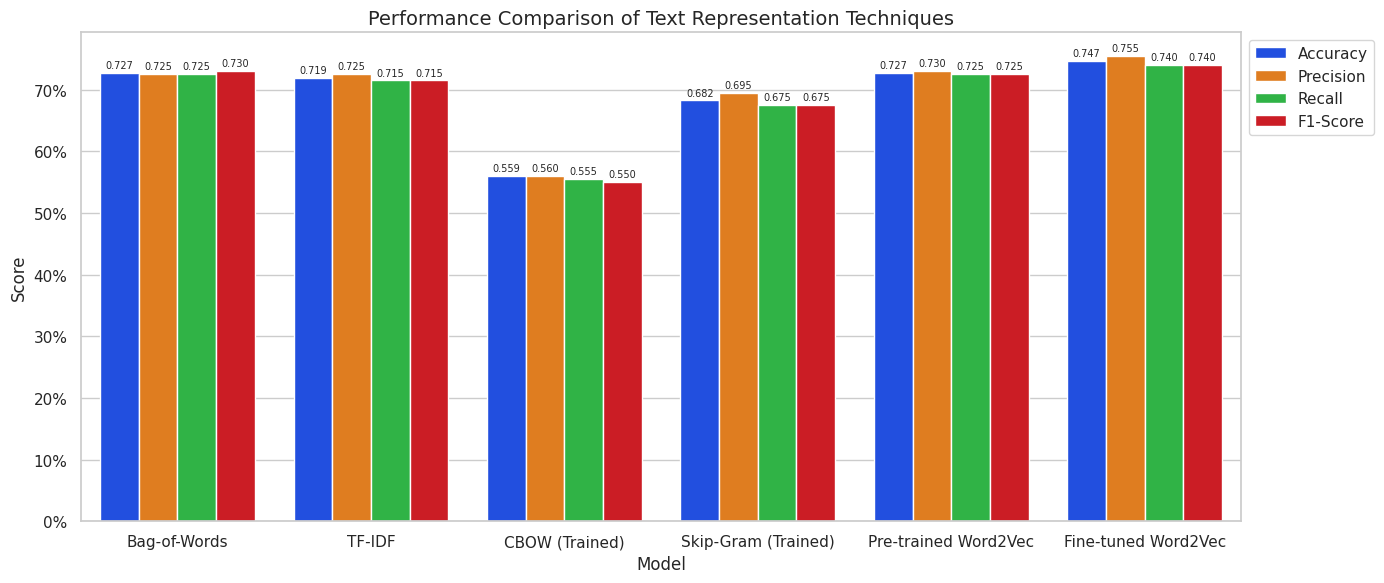

In [ ]:
# Constructing the dataframe using performance metrics
data = {
    "Model": [
        "Bag-of-Words",
        "TF-IDF",
        "CBOW (Trained)",
        "Skip-Gram (Trained)",
        "Pre-trained Word2Vec",
        "Fine-tuned Word2Vec"
    ],
    "Accuracy": [
        0.7273,
        0.7189,
        0.5594,
        0.6825,
        0.7273,
        0.7469
    ],
    "Precision": [
        (0.72 + 0.73)/2,
        (0.74 + 0.71)/2,
        (0.56 + 0.56)/2,
        (0.74 + 0.65)/2,
        (0.74 + 0.72)/2,
        (0.79 + 0.72)/2
    ],
    "Recall": [
        (0.71 + 0.74)/2,
        (0.65 + 0.78)/2,
        (0.41 + 0.70)/2,
        (0.53 + 0.82)/2,
        (0.67 + 0.78)/2,
        (0.64 + 0.84)/2
    ],
    "F1-Score": [
        (0.72 + 0.74)/2,
        (0.69 + 0.74)/2,
        (0.48 + 0.62)/2,
        (0.62 + 0.73)/2,
        (0.70 + 0.75)/2,
        (0.71 + 0.77)/2
    ]
}

df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="whitegrid")

# Melt the DataFrame for a grouped bar plot
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Set plot size
plt.figure(figsize=(14, 6))

# Create barplot
ax = sns.barplot(
    x="Model",
    y="Score",
    hue="Metric",
    data=df_melted,
    palette = sns.color_palette("bright")[:4]

)

# Rotate x-axis labels
plt.xticks(ha='center')

# Add title and format
plt.title("Performance Comparison of Text Representation Techniques", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Model")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=7, padding=2)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

## Reflections

### **(a) What Surprised Me?**

One of the most surprising outcomes of this project was how well simpler models like **TF-IDF** and **Bag-of-Words (BoW)** performed in comparison to more complex, self-trained neural embedding methods such as **Word2Vec (CBOW and Skip-Gram)**. While it is commonly expected that learned embeddings capture deeper semantic relationships and thus should noticeably outperform traditional approaches, our results did not reflect a significant improvement with neural embeddings over TF-IDF.

Several factors may explain this:

1. **Dataset Size & Nature:** The **Dreaddit dataset** is relatively small and domain-specific. For such focused corpora, classical statistical methods like TF-IDF often remain competitive because they are robust and less data-hungry.
2. **Training Sensitivity:** We used a **small context window size of 5** due to the limited data. It was surprising to see how **sensitive Word2Vec embeddings** were to training parameters like context window size, embedding dimension, and corpus size. The performance varied significantly with small tweaks.
3. **Classifier Choice:** For fairness, we used **logistic regression** across all models. While Word2Vec may generate richer embeddings, **logistic regression is a linear classifier** and cannot exploit the complex patterns that embeddings might encode. In such cases, the classifier becomes a bottleneck, limiting performance gains from better representations.


**(b) What can be the scope for improvement?**

There are several potential areas for improvement:

* **Larger Corpus for Training Word Embeddings:** Training Word2Vec models from scratch on the small Dreaddit dataset limits their effectiveness. Using a larger and more diverse text corpus for pretraining (e.g., Reddit dumps, Twitter data, or Wikipedia) could yield more informative embeddings.
* **Model Architecture:** While logistic regression was used uniformly to ensure fair comparison, experimenting with deeper architectures such as shallow feedforward networks or even lightweight CNNs/RNNs might improve performance for neural embeddings.
* **Data Augmentation and Preprocessing:** Incorporating techniques like synonym replacement, paraphrasing, or back-translation could help expand the training dataset and make models more robust.
* **Advanced Embeddings:** Exploring newer embedding techniques like GloVe or FastText (still shallow, but more expressive) could serve as a middle ground between traditional vectorizers and heavy Transformer models.
* **Error Analysis:** A deeper analysis of misclassified samples could reveal specific linguistic patterns or confounding factors affecting classification accuracy, which can then inform targeted improvements.

Overall, while the project validates the utility of foundational NLP techniques, it also opens the door to future work with more sophisticated tools, especially for scaling to broader and more nuanced mental health applications.


## References

* **Datasets:**

  * [Dreaddit Train Dataset (Reddit-based stress classification)](https://www.kaggle.com/datasets/ruchi798/stress-analysis-in-social-media/data?select=dreaddit-train.csv)
  * [Dreaddit Test Dataset (Reddit-based stress classification)](https://www.kaggle.com/datasets/ruchi798/stress-analysis-in-social-media/data?select=dreaddit-test.csv)


* **Educational Content:**

  * Course lectures from *DA623: Computing with Signals*, Winter 2025 (IIT Guwahati)
  * Official TensorFlow and Scikit-learn documentation

* **LLM Assistance:**

  * ChatGPT – used for guidance, and debugging.

* **Tutorials & Inspiration:**

  * [Word Embedding using Word2Vec](https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/)

  * [Machine Learning Mastery – Text Classification](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)
  * [Keras Examples – Text Classification with CNNs](https://keras.io/examples/nlp/text_classification_from_scratch/)

